In [8]:
import json
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the param file that was used to create rosettes
params_path = '/glade/u/home/joko/ice3d/output/params_200_50.json'
# load saved json
with open(params_path, 'rb') as file:
    params_list = json.load(file)

In [48]:
# load data after bug fix in STL generation
data_dir = '/glade/derecho/scratch/joko/synth-ros/params_200_50_20250403/data-v2/'
file_paths = glob.glob(data_dir + "*.txt")
dfs = []
dtypes = {0: int, 6: int, 1: float, 2: float, 
          3: float, 4: float, 5: float, 
          7: float, 8: float, 9: float, 10: float}
for file in file_paths:
    df = pd.read_csv(file, delimiter=",", header=None, dtype=dtypes)
    dfs.append(df)
df1 = pd.concat(dfs, ignore_index=True)
colnames = ['id', 'a', 'c', 'f_r0', 'f_hp', 'f_h0', 'n_arms', 'sa', 'vol', 'sa_eff', 'rho_eff']
df1.columns = colnames
print(df1.shape)
# df1 = df1.set_index('id')
# df1.sort_index(inplace=True)
df1.head()

(10000, 11)


,id,a,c,f_r0,f_hp,f_h0,n_arms,sa,vol,sa_eff,rho_eff
0,6000,18.853575,44.355912,0.803497,0.950749,1.093555,4,44934.342645,329883.100550,0.362739,0.080466
1,6001,18.853575,44.355912,0.803497,0.950749,1.093555,4,42663.086171,308125.528660,0.317901,0.066652
2,6002,18.853575,44.355912,0.803497,0.950749,1.093555,4,45063.016730,340197.868636,0.345141,0.076687
3,6003,18.853575,44.355912,0.803497,0.950749,1.093555,4,47337.486621,361178.174563,0.339395,0.073739
4,6004,18.853575,44.355912,0.803497,0.950749,1.093555,4,45971.094763,371909.871954,0.389581,0.097574


In [49]:
# save merged data
data_dir = '/glade/derecho/scratch/joko/synth-ros/params_200_50_20250403/data-v2/'
save_filename = 'ros-data-merged.txt'
save_path = os.path.join(data_dir, save_filename)
df1.to_csv(save_path, sep=',', index=False)

In [50]:
test = pd.read_csv(save_path) # data: params + outputs
test.head()

,id,a,c,f_r0,f_hp,f_h0,n_arms,sa,vol,sa_eff,rho_eff
0,6000,18.853575,44.355912,0.803497,0.950749,1.093555,4,44934.342645,329883.100550,0.362739,0.080466
1,6001,18.853575,44.355912,0.803497,0.950749,1.093555,4,42663.086171,308125.528660,0.317901,0.066652
2,6002,18.853575,44.355912,0.803497,0.950749,1.093555,4,45063.016730,340197.868636,0.345141,0.076687
3,6003,18.853575,44.355912,0.803497,0.950749,1.093555,4,47337.486621,361178.174563,0.339395,0.073739
4,6004,18.853575,44.355912,0.803497,0.950749,1.093555,4,45971.094763,371909.871954,0.389581,0.097574


In [41]:
# load data from previous data generation
data_dir = '/glade/derecho/scratch/joko/synth-ros/params_200_50_20250403/data/'
file_path = os.path.join(data_dir, 'ros-data-merged.txt')
df2 = pd.read_csv(file_path)
# colnames = ['id', 'a', 'c', 'f_r0', 'f_hp', 'f_h0', 'n_arms', 'sa', 'vol', 'sa_eff', 'rho_eff']
# df2.columns = colnames
# print(df2.shape)
df2 = df2[df2['n_arms']==4]
df2 = df2.set_index('id')
df2.sort_index(inplace=True)
df2.head()

,a,c,f_r0,f_hp,f_h0,n_arms,sa,vol,sa_eff,rho_eff
id,,,,,,,,,,
0,19.677777,26.434892,0.922732,1.120977,1.199872,4,31767.381375,216467.083928,0.471268,0.131537
1,19.677777,26.434892,0.922732,1.120977,1.199872,4,31493.777627,226890.860846,0.543183,0.172833
2,19.677777,26.434892,0.922732,1.120977,1.199872,4,28141.658042,184010.203631,0.498019,0.145684
3,19.677777,26.434892,0.922732,1.120977,1.199872,4,29508.836169,206226.873952,0.527636,0.165823
4,19.677777,26.434892,0.922732,1.120977,1.199872,4,34943.247109,259599.244432,0.469423,0.135935


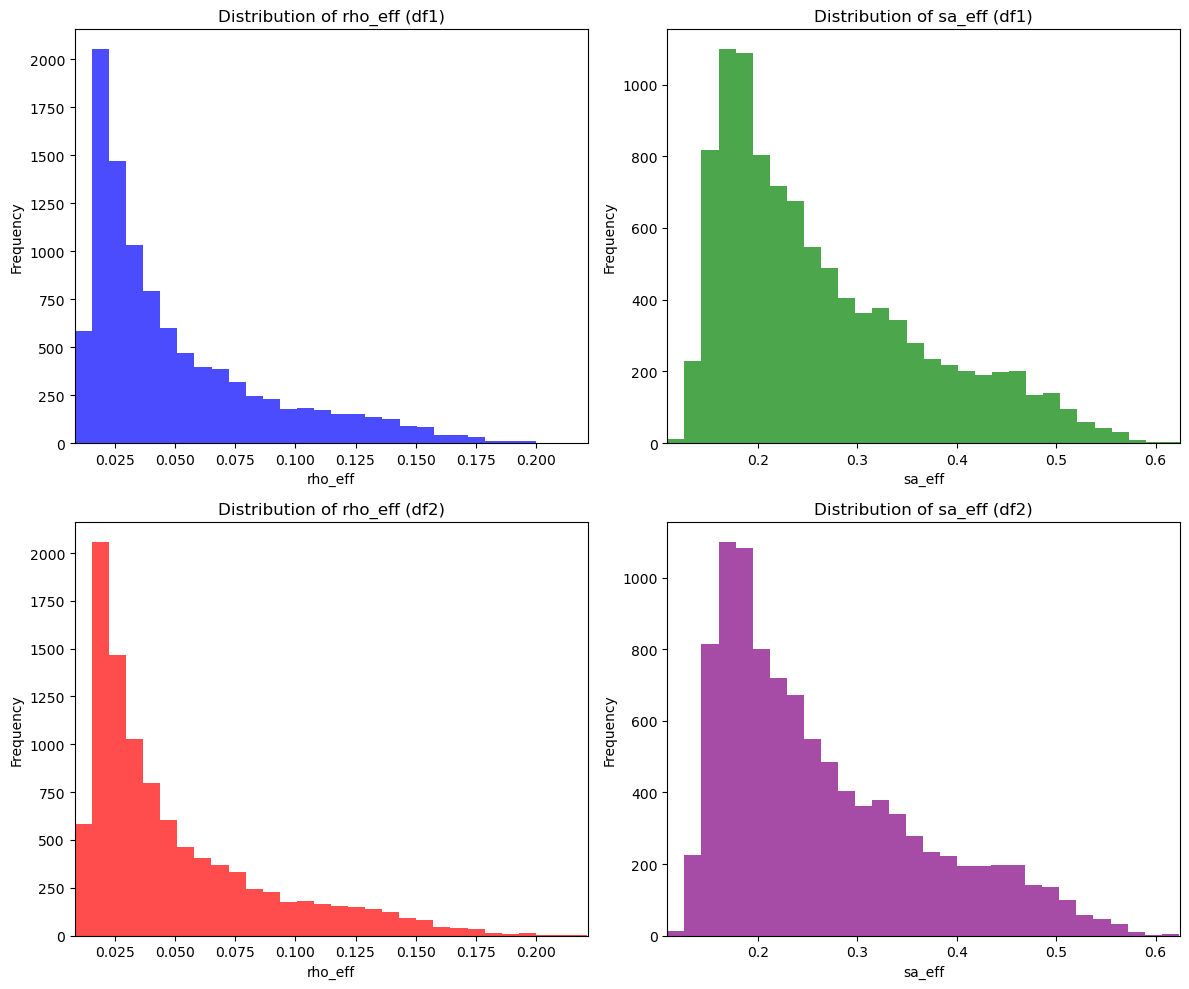

In [42]:
# plot distributions of rho_eff and sa_eff
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of rho_eff for df1
axes[0, 0].hist(df1['rho_eff'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Distribution of rho_eff (df1)')
axes[0, 0].set_xlabel('rho_eff')
axes[0, 0].set_ylabel('Frequency')

# Distribution of sa_eff for df1
axes[0, 1].hist(df1['sa_eff'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('Distribution of sa_eff (df1)')
axes[0, 1].set_xlabel('sa_eff')
axes[0, 1].set_ylabel('Frequency')

# Distribution of rho_eff for df2
axes[1, 0].hist(df2['rho_eff'], bins=30, color='red', alpha=0.7)
axes[1, 0].set_title('Distribution of rho_eff (df2)')
axes[1, 0].set_xlabel('rho_eff')
axes[1, 0].set_ylabel('Frequency')

# Distribution of sa_eff for df2
axes[1, 1].hist(df2['sa_eff'], bins=30, color='purple', alpha=0.7)
axes[1, 1].set_title('Distribution of sa_eff (df2)')
axes[1, 1].set_xlabel('sa_eff')
axes[1, 1].set_ylabel('Frequency')

# Set the same x-limits for rho_eff plots
rho_eff_min = min(df1['rho_eff'].min(), df2['rho_eff'].min())
rho_eff_max = max(df1['rho_eff'].max(), df2['rho_eff'].max())
axes[0, 0].set_xlim(rho_eff_min, rho_eff_max)
axes[1, 0].set_xlim(rho_eff_min, rho_eff_max)

# Set the same x-limits for sa_eff plots
sa_eff_min = min(df1['sa_eff'].min(), df2['sa_eff'].min())
sa_eff_max = max(df1['sa_eff'].max(), df2['sa_eff'].max())
axes[0, 1].set_xlim(sa_eff_min, sa_eff_max)
axes[1, 1].set_xlim(sa_eff_min, sa_eff_max)

plt.tight_layout()
plt.show()

In [43]:
df1.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', name='id', length=10000)

In [44]:
df2.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
      dtype='int64', name='id', length=10000)

In [46]:
# Merge df1 and df2 on their indices to compare rho_eff and sa_eff
comparison = pd.concat(
    [df1[['rho_eff', 'sa_eff']], df2[['rho_eff', 'sa_eff']]],
    axis=1,
    keys=['df1', 'df2']
)

# Identify rows where rho_eff or sa_eff are different
differences_rho = comparison[comparison['df1']['rho_eff'] != comparison['df2']['rho_eff']]
differences_sa = comparison[comparison['df1']['sa_eff'] != comparison['df2']['sa_eff']]

# Combine differences
differences = pd.concat([differences_rho, differences_sa]).drop_duplicates()

print(differences.shape)
print(differences_sa.shape)
print(differences_rho.shape)

(10000, 4)
(10000, 4)
(10000, 4)


In [47]:
differences.head()

df1                 df2          
     rho_eff    sa_eff   rho_eff    sa_eff
id                                        
0   0.131525  0.471492  0.131537  0.471268
1   0.171675  0.541247  0.172833  0.543183
2   0.146394  0.499530  0.145684  0.498019
3   0.166062  0.527877  0.165823  0.527636
4   0.135617  0.468639  0.135935  0.469423